# Исследование объявлений о продаже квартир

___
**Описание проекта**  

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
___
**Цель**  

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 
___
**Описание данных:**  

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении.

## Откроем файл с данными и изучим общую информацию 

### Считаем данные из csv-файла в датафрейм и сохраните в переменную `df`. Путь к файлу:

`/datasets/real_estate_data.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('./real_estate_data.csv', sep='\t')
except:
    print('File_not_found')

### Изучим общую информацию о полученном датафрейме

**Выведем первые 10 строчек датафрейма `df` на экран.**

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Посмотрим на размер данных (количество строк, колонок).**

In [4]:
df.shape

(23699, 22)

**Просмотрим статистическую сводку каждой колонки, чтобы узнать распределение данных в каждой колонки. Используем метод `describe()`.**

In [5]:
df.describe(include = "all")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,23699,23699,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,NaN,NaN,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,NaN,NaN,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,NaN,NaN,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,NaN,NaN,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,NaN,NaN,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных:**

 - `total_images` — число фотографий квартиры в объявлении
 - `last_price` — цена на момент снятия с публикации
 - `total_area` — общая площадь квартиры в квадратных метрах (м²)
 - `first_day_exposition` — дата публикации
 - `rooms` — число комнат
 - `ceiling_height` — высота потолков (м)
 - `floors_total` — всего этажей в доме
 - `living_area` — жилая площадь в квадратных метрах (м²)
 - `floor` — этаж
 - `is_apartment` — апартаменты (булев тип)
 - `studio` — квартира-студия (булев тип)
 - `open_plan` — свободная планировка (булев тип)
 - `kitchen_area` — площадь кухни в квадратных метрах (м²)
 - `balcony` — число балконов
 - `locality_name` — название населённого пункта
 - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
 - `cityCenters_nearest` — расстояние до центра города (м)
 - `parks_around3000` — число парков в радиусе 3 км
 - `parks_nearest` — расстояние до ближайшего парка (м)
 - `ponds_around3000` — число водоёмов в радиусе 3 км
 - `ponds_nearest` — расстояние до ближайшего водоёма (м)
 - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

### Построим общую гистограмму для всех числовых столбцов таблицы

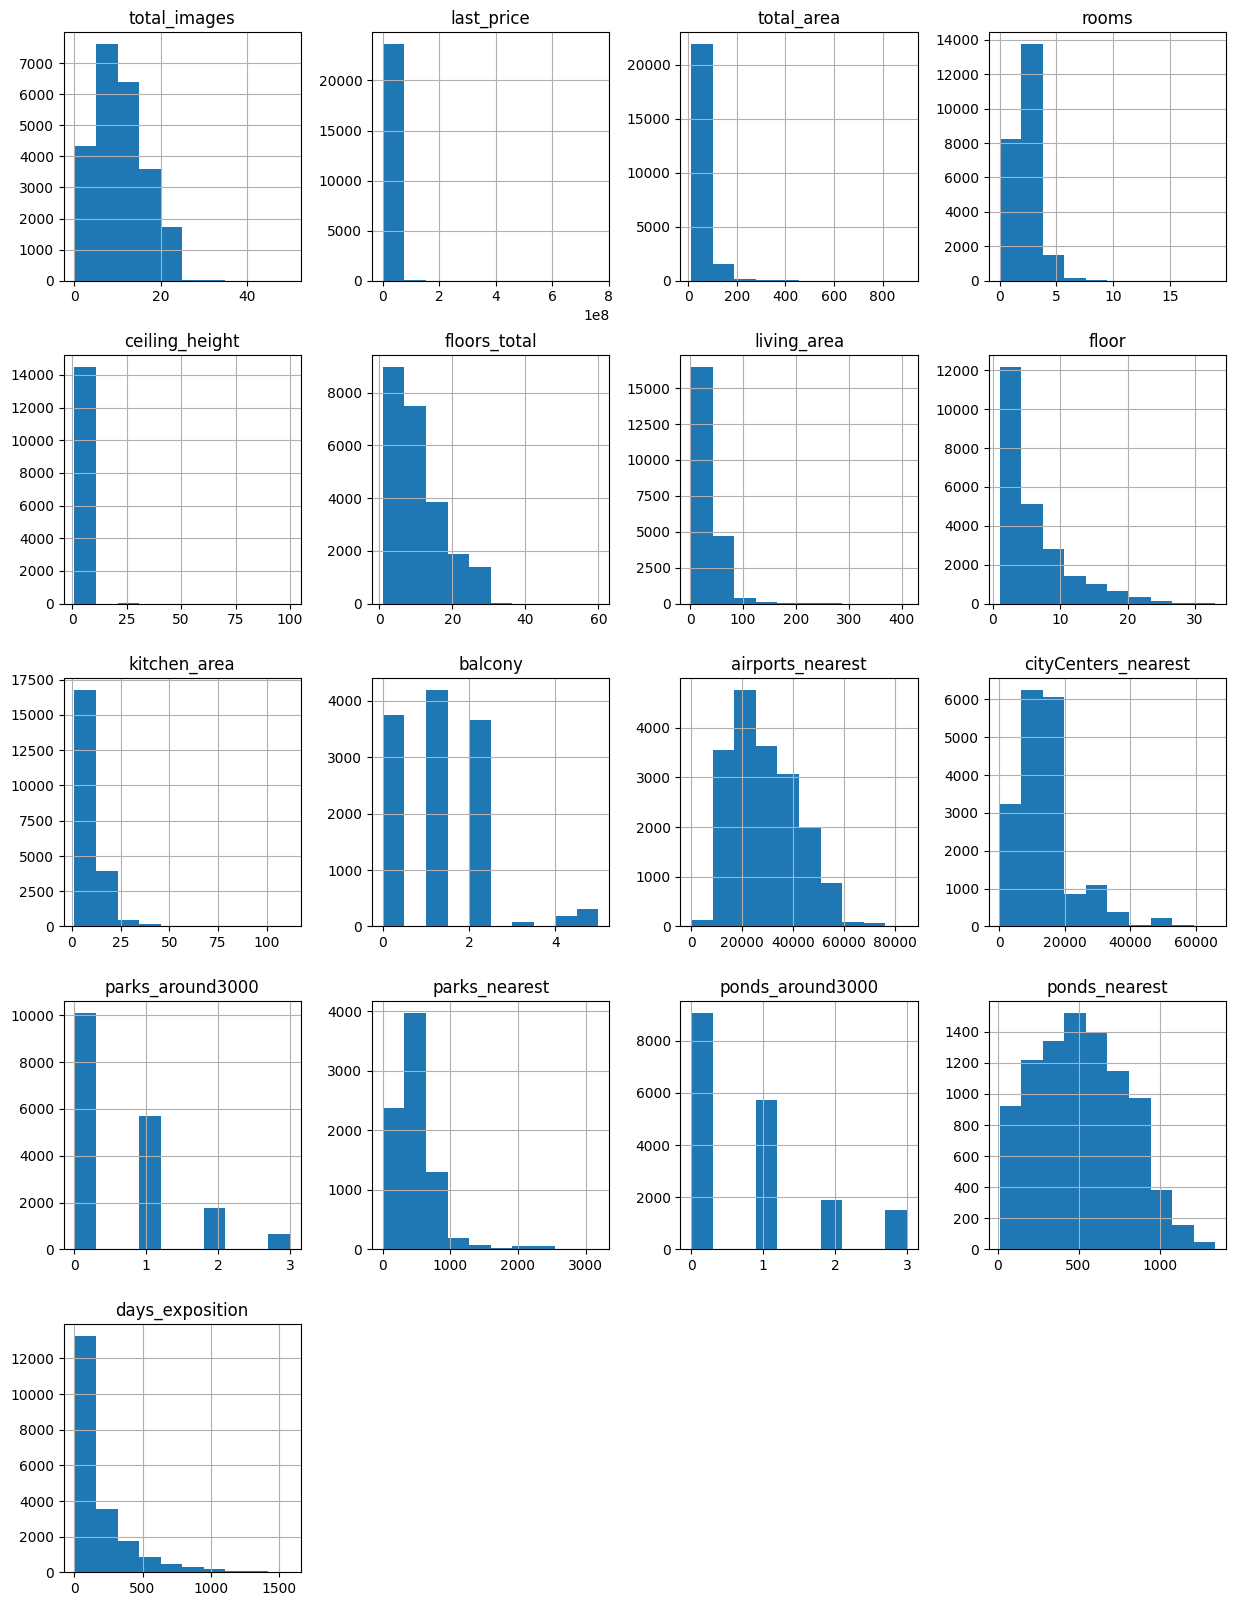

In [7]:
df.hist(figsize=(15, 20));

## Предобработка данных

### Найдем и изучим пропущенные значения в столбцах

**Выведем количество пропущенных значений для каждой колонки. Используем комбинацию двух методов.**

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**В `14` колонках есть пропущенные значения.**

**Заполним пропущенные значения там, где это возможно. Начнем с колонки `balcony`. Предположим, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.**

In [9]:
df['balcony'] = df['balcony'].fillna(0)

**Рассмотрим пропущенные значения в колонке `floors_total`. Предположим, что если если не указано общее количество этажей, то, скорее всего, значение в колонке `floor` соответствует общему количеству этажей. Заполним пропуски из колонки `floor`.**

In [10]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

**Для колонки `living_area` можно найти соотношение средней жилой площади к средней общей площади и использовать полученное значение для замены пропусков.**  
**Найдем это соотношение.**

In [11]:
round((df.query('living_area.isna() == False')['living_area'].mean()) / (df.query('living_area.isna() == False')['total_area'].mean()), 3)

0.573

**Заменим пропуски в колонке `living_area`, соответствующим значением с колонки `total_area` умноженное на `0.573`.**

In [12]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.573)

**Аналогично заполнению пропусков в колонке `living_area`, заполним пропуски в `kitchen_area`.**  
**Найдем соотношение средней площади кухни к средней жилой площади.**

In [13]:
round(df.query('kitchen_area.isna() == False')['kitchen_area'].mean() / df.query('kitchen_area.isna() == False')['living_area'].mean(), 3)

0.304

**Заменим пропуски в колонке `kitchen_area`, соответствующим значением с колонки `living_area` умноженное на `0.304`.**

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['living_area'] * 0.304)

**В колонках `parks_around3000` и `ponds_around3000` одинаковое количество пропусков. Предположим, что пропуски в одних и тех же строках. Проверим эту гипотезу.**

In [15]:
df.query('parks_around3000.isna() and ponds_around3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4000,5,NaN,False,False,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.4300,26,NaN,False,False,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.0000,5,NaN,False,False,9.000000,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.0000,15,NaN,False,False,11.000000,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,18.7944,2,NaN,False,False,5.713498,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.5000,3,NaN,False,False,5.500000,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5000,4,NaN,False,False,6.000000,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0000,4,NaN,False,False,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7000,1,NaN,False,False,9.028800,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Число строк осталось прежним `5518`, что дает на право судить о том, что пропуски в колонках `parks_around3000` и `ponds_around3000` находятся в одних и тех же строках.**

___
>**`Причины, которые могли привести к пропускам в данных:`**  
___
> - В колонке `balcony`, продавец не указал число балконов, скорее всего потому, что в его квартире их нет.
> - Пропущенные значения в колонке `floors_total` скорее всего обусловлены по причине того, что значения соответствуют значениям в колонке `floor`, что соответствуют общему количеству этажей.
> - В колонках `parks_around3000` и `ponds_around3000` одинаковое количество пропусков, вернятнее всего, это вызвано с техническими проблемами при выгрузке данных.
> - В последних колонках `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` подозрительно высокое количество пропущенных значений. Также их количество сопостовимо по количеству между собой. Скорее всего они возникли при выгрузке данных.
___

### Рассмотрим типы данных в каждом столбце

**Ранее уже была вызвана .info(), скопируем полученные из нее данные.**  
  
 0   `total_images`          23699 non-null  `int64`  
 1   `last_price`            23699 non-null  `float64`  
 2   `total_area`            23699 non-null  `float64`  
 3   `first_day_exposition`  23699 non-null  `object`  
 4   `rooms`                 23699 non-null  `int64`  
 5   `ceiling_height`        14504 non-null  `float64`  
 6   `floors_total`          23613 non-null  `float64`  
 7   `living_area`           21796 non-null  `float64`  
 8   `floor`                 23699 non-null  `int64`  
 9   `is_apartment`          2775 non-null   `object`  
 10  `studio`                23699 non-null  `bool`  
 11  `open_plan`             23699 non-null  `bool`  
 12  `kitchen_area`          21421 non-null  `float64`  
 13  `balcony`               23699 non-null  `float64`  
 14  `locality_name`         23650 non-null  `object`  
 15  `airports_nearest`      18157 non-null  `float64`  
 16  `cityCenters_nearest`   18180 non-null  `float64`  
 17  `parks_around3000`      18181 non-null  `float64`  
 18  `parks_nearest`         8079 non-null   `float64`  
 19  `ponds_around3000`      18181 non-null  `float64`  
 20  `ponds_nearest`         9110 non-null   `float64`  
 21  `days_exposition`       20518 non-null  `float64`  
 
  **В колонках: `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` приходят числа с дробной частью .0, хотя в данных категориях нет необходимости в дробной части. Стоит избавиться от дробной части.**  
  
  **Обратим внимание, что в колонках встречаются пропуски данных. Поэтому сменить тип данных с `float` на `int`, не избавившись от пропусков, не получится.**  
  
  **В случае, если в колонке нет пропусков данных, заменим вещественный тип данных на целочисленный с помощью метода `astype()`. Это колонки `last_price`, `balcony`, `floors_total`.**

**Преобразуем тип данных в выбранных столбцах.**

In [16]:
df[['balcony', 'last_price', 'floors_total']] = df[['balcony', 'last_price', 'floors_total']].astype('int')

**Заменим тип данных `float64` на тип данных `float32` в колонках `'total_area'`, `'ceiling_height'`, `'living_area'`, `'kitchen_area'`, `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`, `'parks_nearest'`, `'ponds_around3000'`, `'ponds_nearest'`, `'days_exposition'`, для экономии оперативной памяти:**

In [17]:
df[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']] = df[['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].astype('float32')

**Переименуем колонку `cityCenters_nearest` в `city_centers_nearest`.**

In [18]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

___
>**`Почему нужно изменять тип данных?`**  
___
>- Расчеты с типами данных `int` производятся быстрее по сравнению с типом данных `float`.
>- Некорректно отрабатывают функции сравнения между `int` и `float`.
>- Расчеты с типом данных `float` могут вносить искажения при округлении данных.
>- Целочисленные колонки с пропущенными данными отображаются как тип данных `float`. При возможности, нужно избавляться от пропусков, и преобразовывать в данные в тип `int`.
>- Типы данных `int` более "человекопонятны" и легки для восприятия.
___

### Изучим уникальные значения в колонках с названиями и устраним неявные дубликаты

In [19]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**`поселок Рябово` и `поселок городского типа Рябово`, `поселок Тельмана` и `посёлок Тельмана` — это обозначения одних и тех же населённых пунктов. Аналогично с названиями `городской поселок Янино-1` Создадим новую колонку с названиями населенных пунктов без дубликатов.**

In [20]:
df['replaced_locality_name'] = df['locality_name']

In [21]:
duplicates = ['поселок Рябово', 'поселок городского типа Рябово'] # список неправильных имён
name = 'посёлок городского типа Рябово' # правильное имя
df['replaced_locality_name'] = df['replaced_locality_name'].replace(duplicates, name)

In [22]:
duplicates = ['поселок Тельмана'] # список неправильных имён
name = 'посёлок Тельмана' # правильное имя
df['replaced_locality_name'] = df['replaced_locality_name'].replace(duplicates, name)

In [23]:
duplicates = ['городской поселок Янино-1'] # список неправильных имён
name = 'городской посёлок Янино-1' # правильное имя
df['replaced_locality_name'] = df['replaced_locality_name'].replace(duplicates, name)

### Найдём и устраним редкие и выбивающиеся значения

**Из полученных данных `df.describe()` видим, что максимальная высота потолков составляет `100 метров`, а минимальная `1 м`. Проверим данные в столбце `ceiling_height`. Достоверно известно, что на рынке продаются квартиры с высотой потолков от `2.2 метра` до `10.3 метра`. Все что выше или ниже, будем считать аномалией.**

In [24]:
df.query('ceiling_height < 2.2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name
552,11,2999000,33.500000,2017-03-30T00:00:00,1,2.00,15,17.500000,6,NaN,False,False,6.500000,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,Санкт-Петербург
2572,4,2400000,62.000000,2018-12-27T00:00:00,3,2.00,5,40.000000,4,NaN,False,False,6.000000,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Луга
4212,1,2120000,35.430000,2017-12-18T00:00:00,1,2.00,18,16.600000,9,NaN,False,False,8.800000,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0,Тосно
5712,5,1500000,42.799999,2017-08-14T00:00:00,2,1.20,2,27.500000,1,NaN,False,False,5.200000,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,городской посёлок Мга
5850,9,1650000,35.500000,2018-05-29T00:00:00,1,2.00,5,20.341499,5,NaN,False,False,6.183816,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0,Луга
11352,4,3300000,36.000000,2017-06-18T00:00:00,1,2.00,17,15.200000,12,NaN,False,False,10.100000,0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0,посёлок Металлострой
16446,6,12300000,88.300003,2019-03-12T00:00:00,3,2.00,5,63.900002,2,NaN,False,False,12.000000,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN,Санкт-Петербург
16884,0,1500000,33.000000,2018-10-03T00:00:00,1,2.00,5,20.000000,5,False,False,False,6.000000,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Выборг
16934,5,4100000,40.000000,2017-10-17T00:00:00,1,1.75,37,17.400000,5,NaN,False,False,8.340000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург
19098,7,2700000,56.000000,2018-02-04T00:00:00,3,2.00,5,46.000000,1,NaN,False,False,6.000000,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0,Выборг


In [25]:
df.query('ceiling_height > 10.3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name
355,17,3600000,55.200001,2018-07-12T00:00:00,2,25.0,5,32.000000,2,False,False,False,9.728,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Гатчина
3148,14,2900000,75.000000,2018-11-12T00:00:00,3,32.0,3,53.000000,2,NaN,False,False,8.000,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Волхов
4643,0,4300000,45.000000,2018-02-01T00:00:00,2,25.0,9,30.000000,2,NaN,False,False,7.000,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,Санкт-Петербург
4876,7,3000000,25.000000,2017-09-27T00:00:00,0,27.0,25,17.000000,17,NaN,False,True,5.168,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,посёлок Мурино
5076,0,3850000,30.500000,2018-10-03T00:00:00,1,24.0,5,19.500000,1,True,False,False,5.500,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Санкт-Петербург
5246,0,2500000,54.000000,2017-10-13T00:00:00,2,27.0,5,30.000000,3,NaN,False,False,9.000,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,деревня Мины
5669,4,4400000,50.000000,2017-08-08T00:00:00,2,26.0,9,21.299999,3,NaN,False,False,7.000,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,Санкт-Петербург
5807,17,8150000,80.000000,2019-01-09T00:00:00,2,27.0,36,41.000000,13,NaN,False,False,12.000,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Санкт-Петербург
6246,6,3300000,44.400002,2019-03-25T00:00:00,2,25.0,5,31.299999,5,NaN,False,False,5.700,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,Кронштадт
9379,5,3950000,42.000000,2017-03-26T00:00:00,3,25.0,5,30.000000,2,NaN,False,False,5.200,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург


**В `14` строках приходит выстода потолков ниже `2.2` метров. Допустим выстоту потолков в `2 метра` существующей, однако все что ниже, посчитаем ошибкой в заполнении данных. Это три строки высотой `1`, `1.2`, `1.75 метра`. Заполним эти строки медианой колонки `ceiling_height`.**

In [26]:
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] = df['ceiling_height'].median()

**В строке `15061` приходит высота потолков `14` метров, хотя квартира находится на `5` этаже в `14ти` этажном здании. Скорее всего это вызвано ошибкой заполнения. Заполним её медианой из всех зданий с `14` этажами.**

In [27]:
df.loc[df['ceiling_height'] == 14, 'ceiling_height'] = df.loc[(df['floors_total'] == 14), 'ceiling_height'].median()

In [28]:
df.loc[15061:15061, 'ceiling_height']

15061    2.6
Name: ceiling_height, dtype: float32

**В колонке `ceiling_height` часто приходят значения `25 м` и `32 м`. Логично предположить, что на самом деле это вещественные значения: `2.5 м` и `3.2 м`. Исправим значения, разделив их на `10`.**

In [29]:
df.loc[df['ceiling_height'] > 10.3, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10.3, 'ceiling_height'] / 10

**Проверим, остались ли аномальные данные в колонке `ceiling_height`.**

In [30]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name


In [31]:
df.query('ceiling_height > 10.3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name


**Из полученных данных `df.describe()` видим, что в колонке `rooms`, есть значение `0`. Логично, что не существует жилых помещений с `0 комнат`, даже если это `квартира-студия`, она считается `однокомнатной`. Проверим строки с этим значением и исправим их на значение `1`.**

In [32]:
df.query('rooms < 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name
144,1,2450000,27.000000,2017-03-30T00:00:00,0,NaN,24,15.500000,2,NaN,True,False,4.712000,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,посёлок Мурино
349,4,2320000,25.000000,2017-09-27T00:00:00,0,NaN,14,17.000000,1,NaN,False,True,5.168000,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,деревня Кудрово
440,8,2480000,27.110001,2018-03-12T00:00:00,0,NaN,17,24.750000,4,NaN,True,False,7.524000,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,Санкт-Петербург
508,0,3375000,34.400002,2017-03-28T00:00:00,0,NaN,26,24.299999,19,NaN,False,True,7.387200,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,посёлок Парголово
608,2,1850000,25.000000,2019-02-20T00:00:00,0,NaN,10,14.325000,7,NaN,True,False,4.354800,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,посёлок Шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.000000,2017-09-01T00:00:00,0,NaN,25,18.000000,16,NaN,True,False,5.472000,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,Санкт-Петербург
23442,0,2500000,27.700001,2017-09-28T00:00:00,0,NaN,24,18.000000,4,NaN,False,True,5.472000,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,посёлок Мурино
23554,15,3350000,26.000000,2018-09-07T00:00:00,0,NaN,19,14.898000,8,NaN,True,False,4.528992,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,Санкт-Петербург
23592,10,1450000,29.000000,2017-11-11T00:00:00,0,NaN,9,18.000000,8,NaN,False,True,5.472000,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,Никольское


In [33]:
df.loc[df['rooms'] == 0, 'rooms'] = 1

**Проверим, остались ли аномальные данные в колонке `rooms`.**

In [34]:
df.query('rooms < 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name


In [35]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

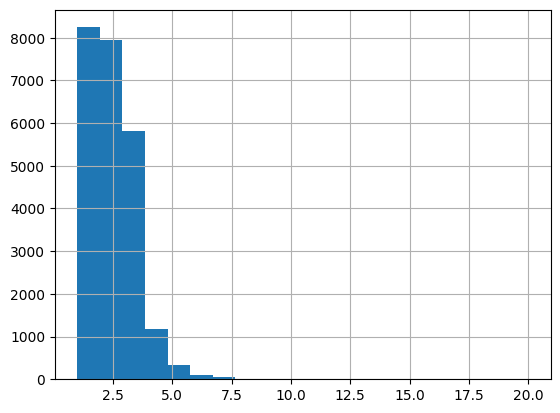

In [36]:
df['rooms'].hist(bins=20, range=(1, 20));

**На графике чётко видно, что после квартир с количеством комнат от `7` практически нет, а после `8` линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше `7`. Посчитаем долю этих квартир от общей доли.**

In [37]:
df.loc[df['rooms'] > 7, 'rooms'].count()

31

In [38]:
round(df.loc[df['rooms'] > 7, 'rooms'].count() / df['rooms'].count(), 3)

0.001

**Получаем `31` квартиру количеством комнат больше `7`, что составляет меньше `0.1%` от общего количества объявлений. Удалим строки с количеством комнат больше `7`.**

In [39]:
df = df.loc[df['rooms'] <= 7]

In [40]:
df['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 7])

**Проверим аномальные значения в колонке `last_price`. Проверим аномально низкие и аномально высокие цены.**

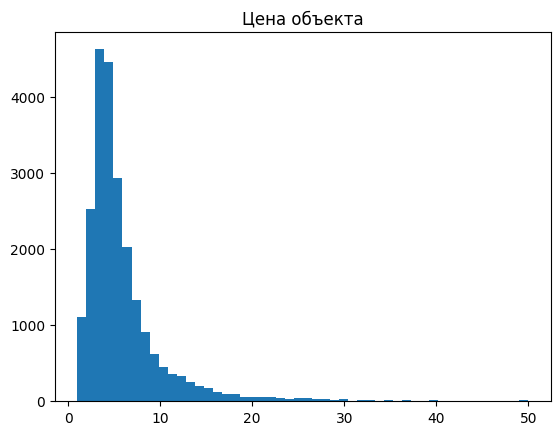

In [41]:
fig, ax = plt.subplots()
ax.hist(df['last_price'] / 1_000_000, bins = 50, range=(1, 50))
ax.set_title('Цена объекта')
plt.show()

In [42]:
df.query('last_price < 400_000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,NaN,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург


**На графике чётко видно, что после квартир с ценой от `27 млн.` практически нет, а после `40 млн.` линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше `27 млн`. Посчитаем долю этих квартир от общей доли.**

In [43]:
df.query('last_price >= 27_000_000')['last_price'].count()

388

In [44]:
round(df.query('last_price >= 27_000_000')['last_price'].count() / df['last_price'].count(), 3)

0.016

**Получаем `395` квартир ценой больше `27 млн.`, что составляет меньше `2%` от общего количества объявлений. Удалим их.**

In [45]:
df = df.loc[df['last_price'] < 27_000_000]

**В одной ячейке `8783` обнаружена аномально низкая цена за двухкомнатную квартиру в Санк-Петербурге. Удалим данную строку.**

In [46]:
df = df.drop(index=[8783]).reset_index(drop=True)

In [47]:
df.loc[8782:8784]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name
8782,15,6270000,71.000000,2019-03-27T00:00:00,3,3.5,3,48.0,2,NaN,False,False,7.50,0,посёлок Стрельна,27457.0,22708.0,2.0,51.0,3.0,319.0,NaN,посёлок Стрельна
8783,2,5450000,56.000000,2015-01-16T00:00:00,2,NaN,5,35.0,3,NaN,False,False,10.64,0,Санкт-Петербург,22517.0,10797.0,2.0,69.0,0.0,NaN,564.0,Санкт-Петербург
8784,14,7300000,75.400002,2018-12-10T00:00:00,3,2.6,10,43.0,10,NaN,False,False,9.00,0,Санкт-Петербург,34218.0,11687.0,0.0,NaN,0.0,NaN,8.0,Санкт-Петербург


**Проверим колонку `total_area` на наличие аномальных данных.**

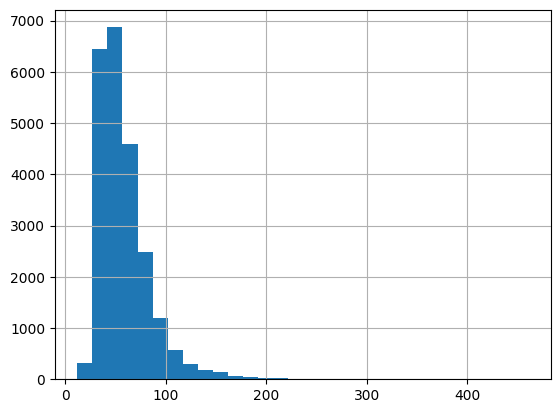

In [48]:
#код ревьюера
df['total_area'].hist(bins=30);

**На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Посчитаем долю этих квартир от общей доли.**

In [49]:
df.loc[df['total_area'] >= 200, 'total_area'].count()

66

In [50]:
round(df.loc[df['total_area'] > 200, 'total_area'].count() / df['total_area'].count(), 3)

0.003

**Получаем `231` квартир площадью больше `200 кв.м`, что составляет меньше `1%` от общего количества объявлений. Удалим их.**

In [51]:
df = df.loc[df['total_area'] < 200]

___
>**Обнаруженны аномальные данные в колонках `ceiling_height`,  `rooms`, `last_price` и `total_area`.**  
___
>- В колонке `ceiling_height` содержались данные со слишком низким и чрезмерно высоким уровнем потолков. Записи с низкими потолками скорее всего возникли в результате ошибки записи, а высокие скорее всего технической ошибкой.  
>- В колонке `rooms` содержались записи с нулем. Логично было заменить подобные данные на единицу. Записи с нулём скорее всего вызваны в результате технической ошибки. Также удалены строки с количеством комнат превышающих `7` как всплески данных.
>- В колонке `last_price` обнаружена аномально низкая цена `12190` в 2-х комнатной квартиры. Также удалены всплески данных с ценой выше `27 млн`.
>- В колонке `total_area` удалены всплески данных с площадью выше `200 кв.м`.
 ___

## Посчитаем и добавим в таблицу новые столбцы

### Добавим цену одного квардратного метра в колонку `price_per_m2`

In [52]:
df['price_per_m2'] = df['last_price'] / df['total_area']

### Добавим день недели публикации объявления в колонку `day_of_publication`

**В начале переведем тип данных в колонке `first_day_exposition` в тип данных `datetime`.**

In [53]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Добавим колонку `day_exposition` и присвоим ему значения**

In [54]:
df['day_of_publication'] = df['first_day_exposition'].dt.weekday

### Добавим месяц публикации объявления в колонку `publication_month`

In [55]:
df['publication_month'] = df['first_day_exposition'].dt.month

### Добавим год публикации объявления в колонку `publication_year`

In [56]:
df['publication_year'] = df['first_day_exposition'].dt.year

### Добавим тип этажа квартиры в колонку `apartment_floor_type` (значения — «первый», «последний», «другой»)

**Добавим функцию, которая будет принимать на входе значение этажа, возвращать значения — «первый», «последний», «другой».**

In [57]:
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

**Вызовем функцию методом `.apply`**

In [58]:
df['apartment_floor_type'] = df.apply(categorize_floor, axis = 1)

### Добавим расстояние до центра города в километрах в колонку `city_centers_nearest_km` (переведите из м в км и округлите до целых значений)

In [59]:
df['city_centers_nearest_km'] = df['city_centers_nearest'] / 1000

**Округлим значения до целых.**

In [60]:
df['city_centers_nearest_km'] = round(df['city_centers_nearest_km'])

## Проведем исследовательский анализ данных

### Изучим следующие параметры объектов: 

#### Общая площадь

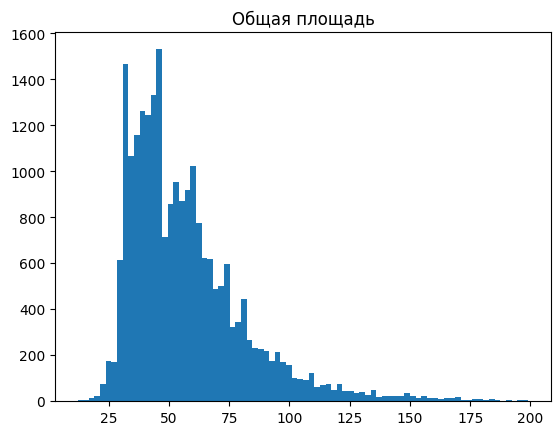

In [61]:
fig, ax = plt.subplots()
ax.hist(df['total_area'], bins = 80)
ax.set_title('Общая площадь')
plt.show()

**Основная масса объявлений составляют помещения с общей площадью от 30 до 80 кв.м.**  
**Объявлений с площадью больше 80 кв.м меньше одной тысячи.**

#### Жилая площадь

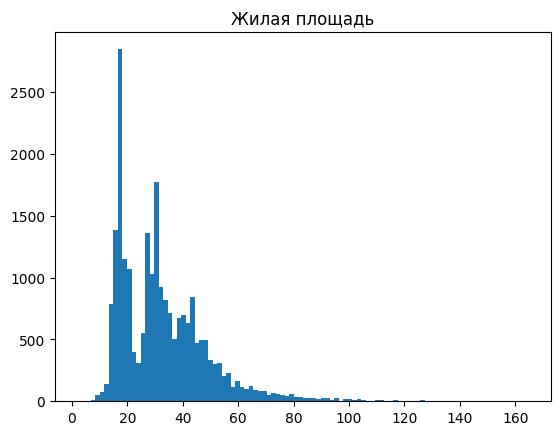

In [62]:
fig, ax = plt.subplots()
ax.hist(df['living_area'], bins = 100)
ax.set_title('Жилая площадь')
plt.show()

**По сравнению с общей площадью, жилая площадь в основной массе представлена до 50 кв.м. Если отнять от общей площади площадь кухни и сантехнических узлов, все выглядит логично.**

#### Площадь кухни

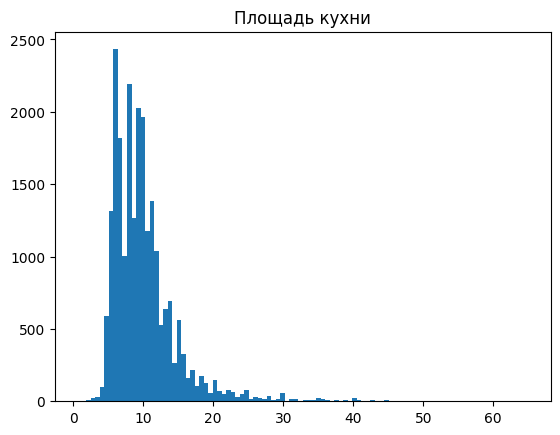

In [63]:
fig, ax = plt.subplots()
ax.hist(df['kitchen_area'], bins = 100)
ax.set_title('Площадь кухни')
plt.show()

**Площадь кухни варьируется от пары квадратных метров до 20 квадратов. Лишь очень малая часть объялений может превысить порог.**

#### Цена объекта

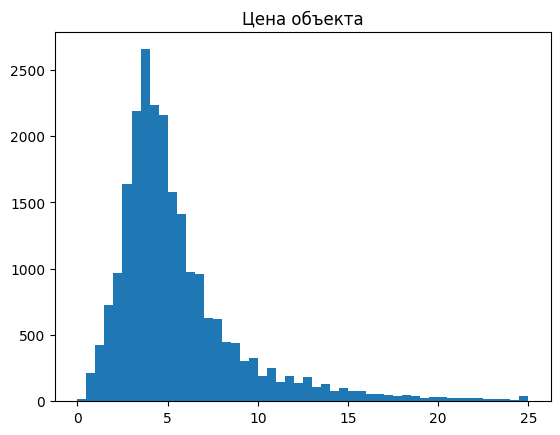

In [64]:
fig, ax = plt.subplots()
ax.hist(df['last_price'] / 1_000_000, bins = 50, range=(0, 25))
ax.set_title('Цена объекта')
plt.show()

**Большая часть объявлений находится в ценовом сегменте от 3 до 6 млн. После 7 млн. количество объявлений резко снижается.**

#### Количество комнат

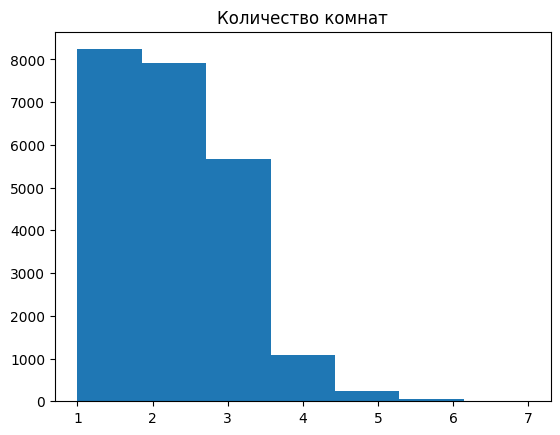

In [65]:
fig, ax = plt.subplots()
ax.hist(df['rooms'], bins = 7)
ax.set_title('Количество комнат')
plt.show()

**Основная масса объявлений 1 и 2 комнатные помещения. Далее 3 комнатные. Остальные обявления составляют меньше 2 тыс.**

#### Высота потолков

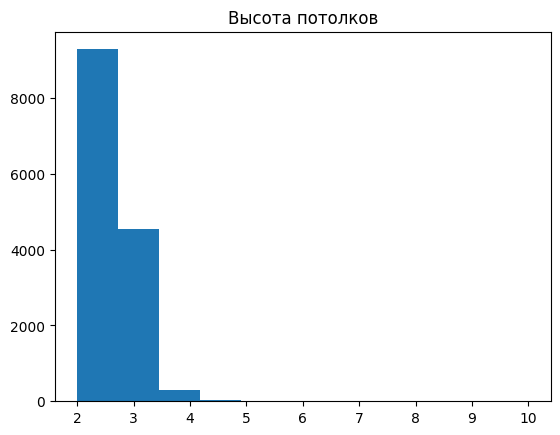

In [66]:
fig, ax = plt.subplots()
ax.hist(df['ceiling_height'], bins = 11, range=(2, 10))
ax.set_title('Высота потолков')
plt.show()

**Большинство объявлений представлено с высотой потолков от 2.6 до 3.1 метров. Помещения выше составляют небольшое количество.**

#### Этаж квартиры

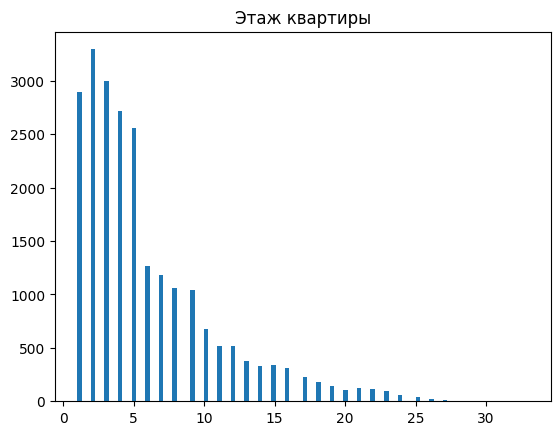

In [67]:
fig, ax = plt.subplots()
ax.hist(df['floor'], bins = 100)
ax.set_title('Этаж квартиры')
plt.show()

**Исходя из данного графика, можно выделить три категории помещений. Первая большая группа помещений от 1 до 5 этажа. Вторая группа, немного меньше чем в 2 раза, помещения от 5 до 10 этажа. Третья, самая маленькая по количеству объявлений, от 10 этажа и выше.**

#### Тип этажа квартиры («первый», «последний», «другой»)

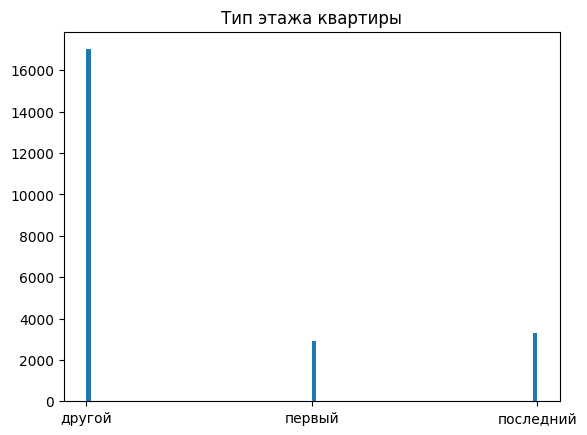

In [68]:
fig, ax = plt.subplots()
ax.hist(df['apartment_floor_type'], bins = 100)
ax.set_title('Тип этажа квартиры')
plt.show()

**Наименьшее число объявлений размещено на первом и последнем этаже. Большинство объявлений размещено в категории другой.**

#### Общее количество этажей в доме

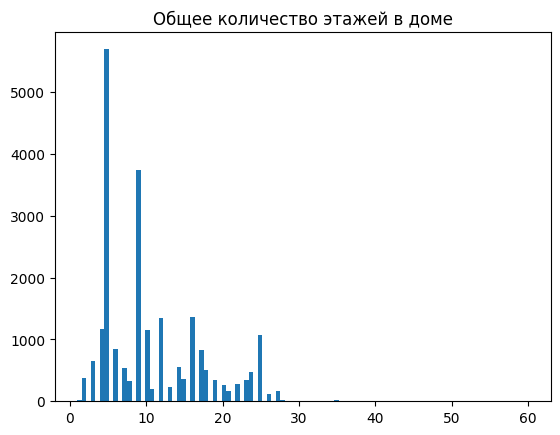

In [69]:
fig, ax = plt.subplots()
ax.hist(df['floors_total'], bins = 100)
ax.set_title('Общее количество этажей в доме')
plt.show()

**Отчетливо видно, что большинство объявлений составляют пятиэтажки и девятиэтажки, что соотносится с действительностью.**

#### Расстояние до центра города в метрах

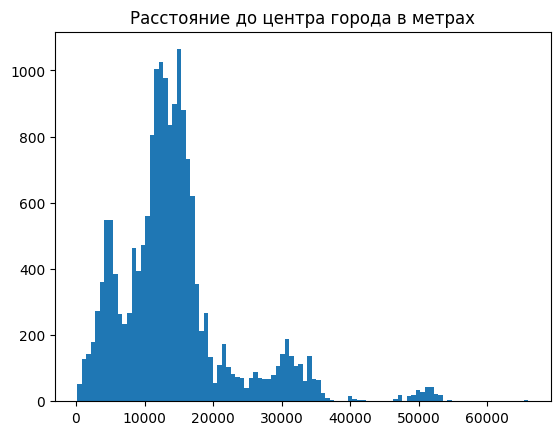

In [70]:
fig, ax = plt.subplots()
ax.hist(df['city_centers_nearest'], bins = 100)
ax.set_title('Расстояние до центра города в метрах')
plt.show()

**Большинство объявлений находится от 10 до 15 км от центра города, в спальных районах. Следующая категория по количеству объявлений находится в центре города, до 10 км.**

#### Расстояние до ближайшего аэропорта

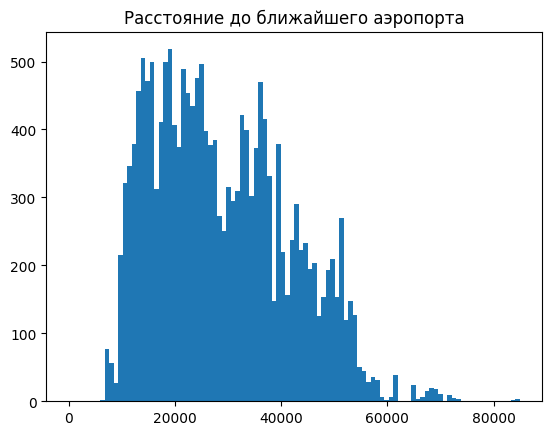

In [71]:
fig, ax = plt.subplots()
ax.hist(df['airports_nearest'], bins = 100)
ax.set_title('Расстояние до ближайшего аэропорта')
plt.show()

**Большинство объялений находятся в удалении от 8 до 40 километров от аэропорта.**

#### Расстояние до ближайшего парка

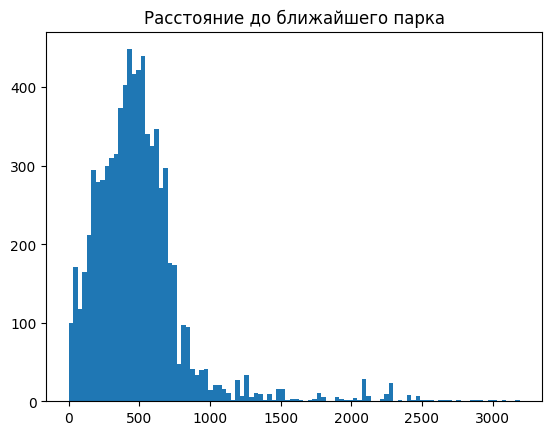

In [72]:
fig, ax = plt.subplots()
ax.hist(df['parks_nearest'], bins = 100)
ax.set_title('Расстояние до ближайшего парка')
plt.show()

**Санк-Петербург и ближайщие населенные пункты, самые парковые? У всех объявлений ближайший парк находится на расстоянии до 1 километра.**

#### День и месяц публикации объявления

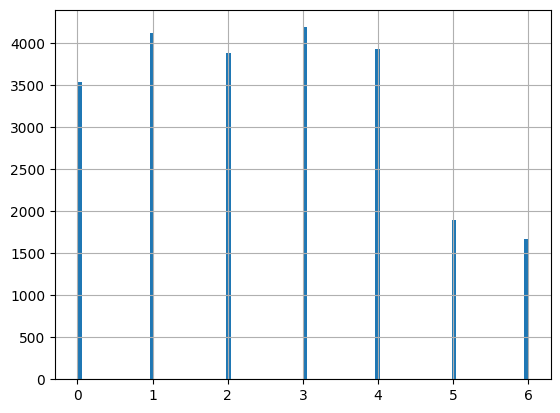

In [73]:
df['day_of_publication'].hist(bins=100);

**В среднем объявления публикуют в будние дни. Меньше всего публикаций в выходные дни.**

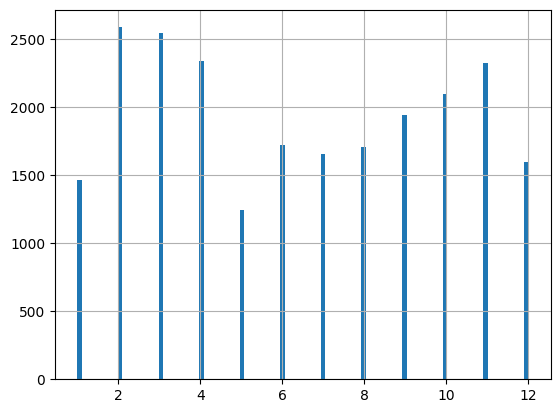

In [74]:
df['publication_month'].hist(bins=100);

**Прослеживается сезонность публикаций. Большинство публикаций происходит весной и осенью. Меньше всего публикаций летом и зимой, возможно это связано с отпусками.**

### Изучим, как быстро продавались квартиры (столбец days_exposition)

#### Построим гистограмму

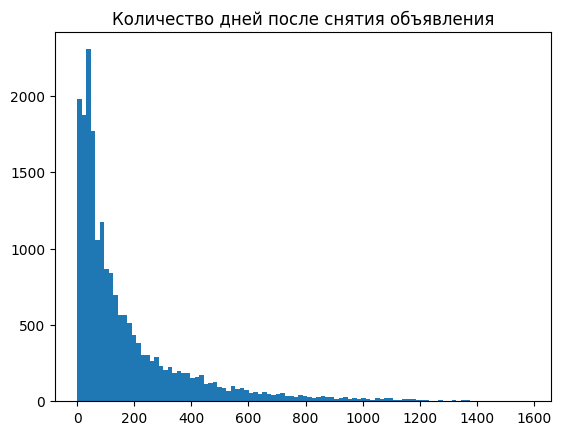

In [75]:
fig, ax = plt.subplots()
ax.hist(df['days_exposition'], bins = 100)
ax.set_title('Количество дней после снятия объявления')
plt.show()

#### Посчитаем среднее и медиану

**Посчитаем среднее арифметическое колонки `days_exposition`.**

In [76]:
df['days_exposition'].mean()

178.62936

**Посчитаем медиану колонки `days_exposition`.**

In [77]:
df['days_exposition'].median()

94.0

___
>**Cколько времени обычно занимает продажа?**  
___
>- В большинстве объявлений продажа занимает до 2 месяцев.
>- Среднее арифметическое продаж всех объялений показывает 180 дней, потому что максимальная величина продажи составляет 1580 дней.
>- Медиана более близка к большинству продаж и показывает 95 дней. Гистограмма более информативна в отображении времени продаж.
___
>**Какие продажи можно считать быстрыми, а какие — необычно долгими?**  
___  
>- Быстрыми продажами можно считать срок от 1 до 20-30 дней.
>- Долгими продажами можно считать продажи свыше 200 дней.
___

### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта. Изучим, зависит ли цена от:

#### Общей площади

0.7841020489320948

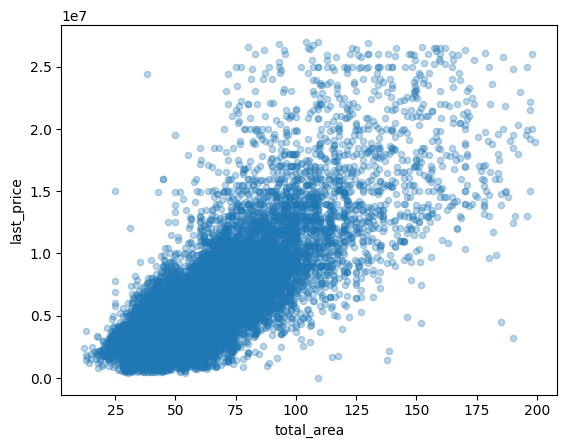

In [78]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);
display((df['total_area']).corr(df['last_price']))

**Корреляция в `0.78` говорит о наличии большой взаимосвязи цены от общей площади. На графике видна положительная сильная корреляция обоих значений до `110 кв.м`. Далее идет разброс данных, и сила корреляции не так очевидна.**

#### Жилой площади

0.6763814600471533

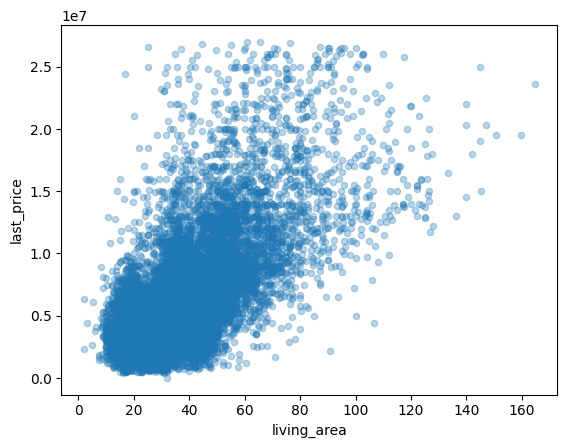

In [79]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3);
display((df['living_area']).corr(df['last_price']))

**Корреляция в `0.67` говорит о наличии взаимосвязи цены от жилой площади. На графике видно положительное рассеивание обоих значений до `80 кв.м`. Далее идет разброс данных, и сила корреляции не так очевидна.**

#### Площади кухни

0.6151150926361396

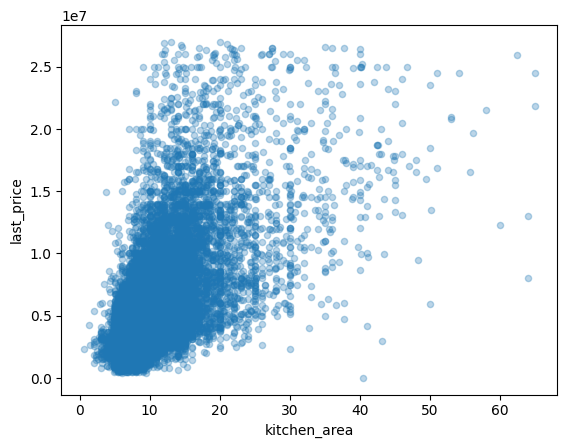

In [80]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);
display((df['kitchen_area']).corr(df['last_price']))

**Корреляция в `0.61` говорит о наличии взаимосвязи цены от площади кухни. На графике видно положительное рассеивание обоих значений до `22 кв.м`. Далее идет разброс данных, и сила корреляции не так очевидна.**

#### Количества комнат

0.49721077167111793

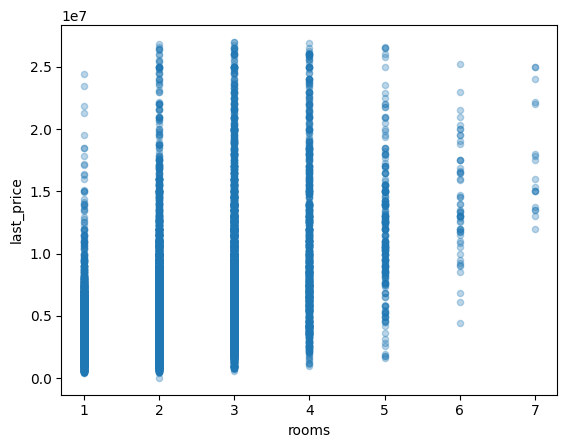

In [81]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);
display((df['rooms']).corr(df['last_price']))

**Корреляция в `0.49` говорит о наличии связи, однако не слишком сильной. Она заметна в 2, 3, 4-х комнатных квартирах, и незаметна в остальных.**

#### Этажа, на котором расположена квартира (первый, последний, другой)

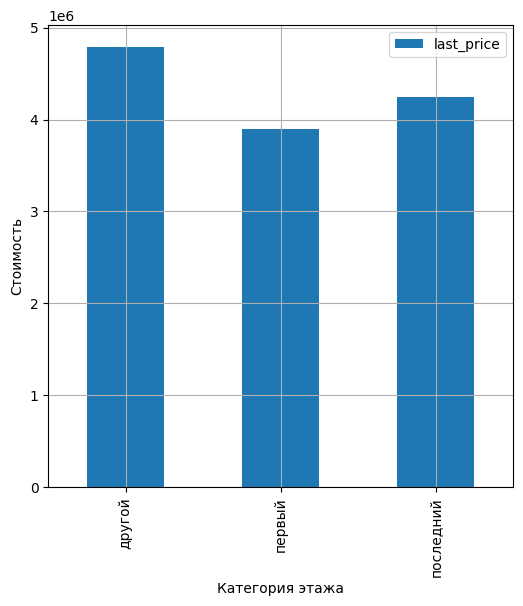

In [82]:
df.pivot_table(index='apartment_floor_type', values='last_price', aggfunc=('median')).plot(kind='bar', figsize=(6, 6), grid=True)
plt.xlabel('Категория этажа')
plt.ylabel('Стоимость')
plt.show()

**Квартиры, которые находятся на `первом этаже` стоят дешевле. `Последний этаж` чуть дороже `первого этажа`.**  
**Явно, что квартиры, которые находятся на `других этажах`, стоят дороже, чем на `первом` или `последнем`.**

#### Даты размещения (день недели, месяц, год)

**День недели:**

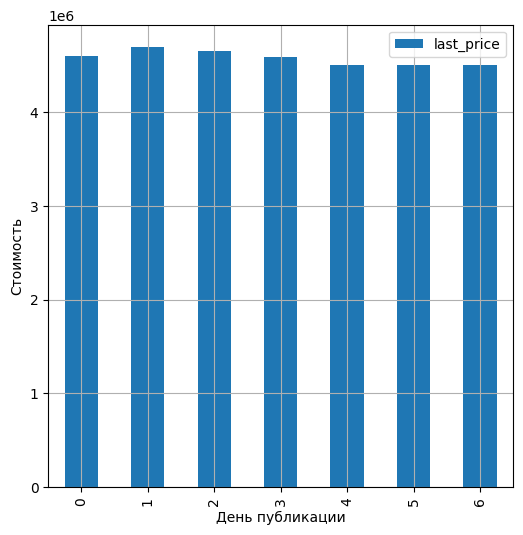

In [83]:
df.pivot_table(index='day_of_publication', values='last_price', aggfunc=('median')).plot(kind='bar', figsize=(6, 6), grid=True)
plt.xlabel('День публикации')
plt.ylabel('Стоимость')
plt.show()

**Заметно, что высокие цены выставляются во `вторник`. Далее заметно снижение цен до конца недели.**  
**Самые низкие цены в `субботу` и `воскресенье`.**

**Месяц публикации:**

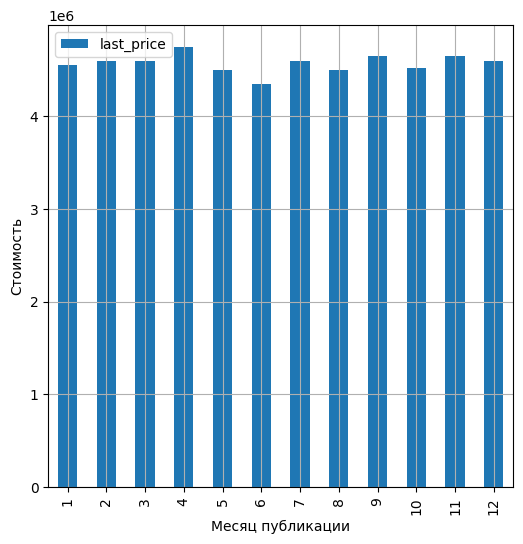

In [84]:
df.pivot_table(index='publication_month', values='last_price', aggfunc=('median')).plot(kind='bar', figsize=(6, 6), grid=True)
plt.xlabel('Месяц публикации')
plt.ylabel('Стоимость')
plt.show()

**Самые высокие цены в начале весны в `апреле`. Самые низкие цены в `июне`, скроее всего это связано с началом лета и сезоном отпусков.**

**Год публикации:**

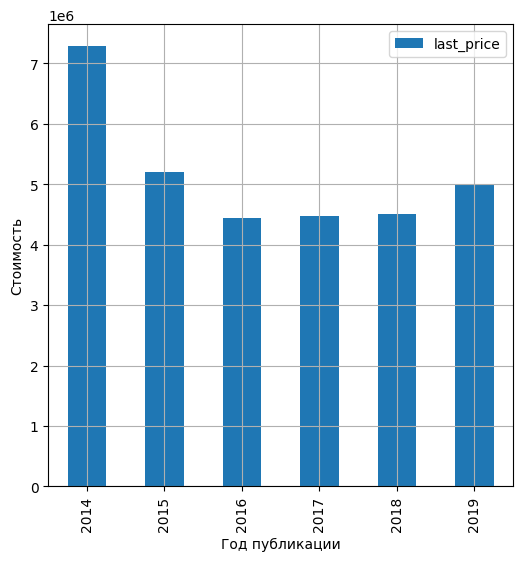

In [85]:
df.pivot_table(index='publication_year', values='last_price', aggfunc=('median')).plot(kind='bar', figsize=(6, 6), grid=True)
plt.xlabel('Год публикации')
plt.ylabel('Стоимость')
plt.show()

**В `2014` году были самые высокие цены на недвижимость, затем падение в `2015` году. Цены плавно снижались до `2018` года, а в `2019` замечен рост.**

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

**Выделем населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в колонке `locality_name`.**

In [86]:
price_for_10 = df.pivot_table(index='locality_name',
                              values='price_per_m2',
                              aggfunc=('count', 'median', 'mean'))

In [87]:
price_for_10.sort_values(by='count', ascending=False).head(10)

,count,mean,median
locality_name,,,
Санкт-Петербург,15252,110146.093178,104081.632653
посёлок Мурино,522,85752.189068,85878.461452
посёлок Шушары,440,78677.364183,76876.173683
Всеволожск,398,68654.474154,65789.473684
Пушкин,363,102699.951411,99987.179487
Колпино,337,75333.295708,74722.222222
посёлок Парголово,326,90332.263052,91780.225245
Гатчина,307,68746.146675,67796.612118
деревня Кудрово,299,92473.547479,91860.465116


**Cамые дорогие квартиры в Санкт-Петербурге и в Пушкине. В Выборге средняя цена за квадратный метр в 2 раза ниже, чем в Петербурге.**

### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра

In [88]:
aparts_in_spb = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km != 0')

In [89]:
aparts_in_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,replaced_locality_name,price_per_m2,day_of_publication,publication_month,publication_year,apartment_floor_type,city_centers_nearest_km
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0
2,10,5196000,56.000000,2015-08-20,2,NaN,5,34.299999,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0
3,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0
6,5,7915000,71.599998,2019-04-18,2,NaN,24,41.026798,22,NaN,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,110544.695093,3,4,2019,другой,12.0
8,18,5400000,61.000000,2017-02-26,3,2.50,9,43.599998,7,NaN,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,88524.590164,6,2,2017,другой,15.0


In [90]:
aparts_in_spb_pivot = aparts_in_spb.pivot_table(index='city_centers_nearest_km',
                          values='price_per_m2',
                          aggfunc='mean')
display(aparts_in_spb_pivot)

,price_per_m2
city_centers_nearest_km,
1.0,133321.785651
2.0,128520.861566
3.0,116653.918040
4.0,124309.287072
5.0,130886.920296
6.0,129784.674656
7.0,128810.362219
8.0,124057.498566
9.0,111747.618491


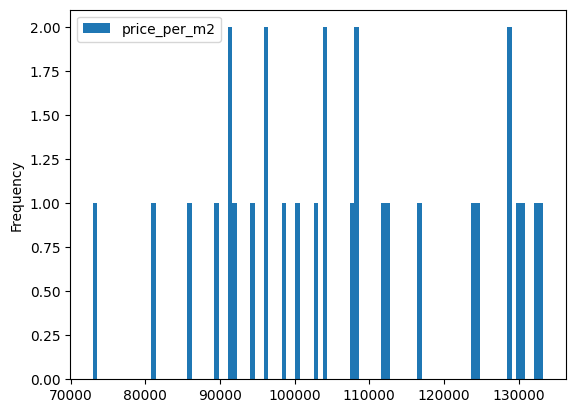

In [91]:
aparts_in_spb_pivot.plot(kind='hist', bins=100);

**Ожидаемо, что в самом центре, в радиусе до 1 км, медианная цена на квартиру стремится к 20 миллионам. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра.**

## Общий вывод

___
**`Описание проекта`**  

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.  
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.  
___
**`В процессе предобработки данных, найдены пропуски данных, неверно указынные типы данных, найдены и устранены редкие выбивающиеся значения:`**  

*Причины, которые могли привести к пропускам в данных:*  

- В колонке `balcony`, продавец не указал число балконов, скорее всего потому, что в его квартире их нет.
- Пропущенные значения в колонке `floors_total` скорее всего обусловлены по причине того, что значения соответствуют значениям в колонке `floor`, что соответствуют общему количеству этажей.
- В колонках `parks_around3000` и `ponds_around3000` одинаковое количество пропусков, вернятнее всего, это вызвано с техническими проблемами при выгрузке данных.
- В последних колонках `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` подозрительно высокое количество пропущенных значений. Также их количество сопостовимо по количеству между собой. Скорее всего они возникли при выгрузке данных.   

*Обнаруженны аномальные данные в колонках `ceiling_height`,  `rooms`, `last_price` и `total_area`.* 

- В колонке `ceiling_height` содержались данные со слишком низким и чрезмерно высоким уровнем потолков. Записи с низкими потолками скорее всего возникли в результате ошибки записи, а высокие скорее всего технической ошибкой.  
- В колонке `rooms` содержались записи с нулем. Логично было заменить подобные данные на единицу. Записи с нулём скорее всего вызваны в результате технической ошибки. Также удалены строки с количеством комнат превышающих `7` как всплески данных.
- В колонке `last_price` обнаружена аномально низкая цена `12190` в 2-х комнатной квартиры. Также удалены всплески данных с ценой выше `27 млн`.
- В колонке `total_area` удалены всплески данных с площадью выше `200 кв.м`.  
___
**`Для удобства в дальнейших расчетов, в таблицу были добавлены новые колонки со следующими параметрами:`**  

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (метры переведены в км и округлены до целых значений).  
___
**`Исследовательский анализ данных:`**  
___
**`Изучены и сделаны выводы по следующим параметрам объектов:`**  

* `Общая площадь:`
  * Основная масса объявлений составляют помещения с общей площадью от 30 до 80 кв.м. Объявлений с площадью больше 80 кв.м меньше одной тысячи.
* `Жилая площадь:`
  * По сравнению с общей площадью, жилая площадь в основной массе представлена до 50 кв.м. Если отнять от общей площади площадь кухни и сантехнических узлов, все выглядит логично.
* `Площадь кухни:`
  * Площадь кухни варьируется от пары квадратных метров до 20 квадратов. Лишь очень малая часть объялений может превысить порог.
* `Цена объекта:`
  * Большая часть объявлений находится в ценовом сегменте от 3 до 6 млн. После 7 млн. количество объявлений резко снижается.
* `Количество комнат:`
  * Основная масса объявлений 1 и 2 комнатные помещения. Далее 3 комнатные. Остальные обявления составляют меньше 2 тыс.
* `Высота потолков:`
  * Большинство объявлений представлено с высотой потолков от 2.6 до 3.1 метров. Помещения выше составляют небольшое количество.
* `Этаж квартиры:`
  * Можно выделить три категории помещений. Первая большая группа помещений от 1 до 5 этажа. Вторая группа, немного меньше чем в 2 раза, помещения от 5 до 10 этажа. Третья, самая маленькая по количеству объявлений, от 10 этажа и выше.
* `Тип этажа квартиры («первый», «последний», «другой»):`
  * Наименьшее число объявлений размещено на первом и последнем этаже. Большинство объявлений размещено в категории другой.
* `Общее количество этажей в доме:`
  * Большинство объявлений составляют пятиэтажки и девятиэтажки, что соотносится с действительностью.
* `Расстояние до центра города в метрах:`
  * Большинство объявлений находится от 10 до 15 км от центра города, в спальных районах. Следующая категория по количеству объявлений находится в центре города, до 10 км.
* `Расстояние до ближайшего аэропорта:`
  * Большинство объялений находятся в удалении от 8 до 40 километров от аэропорта.
* `Расстояние до ближайшего парка:`
  * Санк-Петербург и ближайщие населенные пункты, самые парковые. У всех объявлений ближайший парк находится на расстоянии до 1 километра.
* `День и месяц публикации объявления:`
  * В среднем объявления публикуют в будние дни. Меньше всего публикаций в выходные дни.
  * Прослеживается сезонность публикаций. Большинство публикаций происходит весной и осенью. Меньше всего публикаций летом и зимой, возможно это связано с отпусками.
___
**`Следующее, что было изучено, это как быстро продавались квартиры. Было сделано нескольно выводов на два следующих вопроса:`**

*Cколько времени обычно занимает продажа?*  

- В большинстве объявлений продажа занимает до 2 месяцев.
- Среднее арифметическое продаж всех объялений показывает 180 дней, потому что максимальная величина продажи составляет 1580 дней.
- Медиана более близка к большинству продаж и показывает 95 дней. Гистограмма более информативна в отображении времени продаж.

*Какие продажи можно считать быстрыми, а какие — необычно долгими?*  
  
- Быстрыми продажами можно считать срок от 1 до 20-30 дней.
- Долгими продажами можно считать продажи свыше 200 дней.  
___
**`Изучено какие факторы больше всего влияют на общую (полную) стоимость объекта. Изучено, зависит ли цена от:`**

* `Общей площади:`
  * Корреляция в 0.78 говорит о наличии большой взаимосвязи цены от общей площади. На графике видна положительная сильная корреляция обоих значений до 110 кв.м. Далее идет разброс данных, и сила корреляции не так очевидна.
* `Жилой площади:`
  * Корреляция в 0.67 говорит о наличии взаимосвязи цены от жилой площади. На графике видно положительное рассеивание обоих значений до 80 кв.м. Далее идет разброс данных, и сила корреляции не так очевидна.
* `Площади кухни:`
  * Корреляция в 0.61 говорит о наличии взаимосвязи цены от площади кухни. На графике видно положительное рассеивание обоих значений до 22 кв.м. Далее идет разброс данных, и сила корреляции не так очевидна.
* `Количества комнат:`
  * Корреляция в 0.49 говорит о наличии связи, однако не слишком сильной. Она заметна в 2, 3, 4-х комнатных квартирах, и незаметна в остальных.
* `Этажа, на котором расположена квартира (первый, последний, другой):`
  * Квартиры, которые находятся на первом этаже стоят дешевле. Последний этаж чуть дороже первого этажа. Явно, что квартиры, которые находятся на других этажах, стоят дороже, чем на первом или последнем.
* `Даты размещения (день недели, месяц, год):`
  * Заметно, что высокие цены выставляются во вторник. Далее заметно снижение цен до конца недели. Самые низкие цены в субботу и воскресенье.
  * Самые высокие цены в начале весны в апреле. Самые низкие цены в июне, скроее всего это связано с началом лета и сезоном отпусков.
  * В 2014 году были самые высокие цены на недвижимость, затем падение в 2015 году. Цены плавно снижались до 2018 года, а в 2019 замечен рост.
___
**`Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений`**

* Cамые дорогие квартиры в Санкт-Петербурге и в Пушкине. В Выборге средняя цена за квадратный метр в 2 раза ниже, чем в Петербурге.
___
**`Посчитана средняя цена квадратного метра, в зависимости от удаления от центра в Санкт-Петербурге, по каждому километру`**

* Ожидаемо, что в самом центре, в радиусе до 1 км, медианная цена на квартиру стремится к 20 миллионам. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод